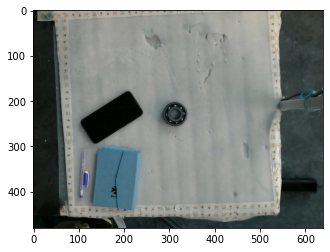

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

#def grab_frame(cap):
#    ret,frame = cap.read()
#    return cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

#Initiate the two cameras
#cap1 = cv2.VideoCapture(0)
#cap2 = cv2.VideoCapture(1)

#create two subplots
ax1 = plt.subplot(1,1,1)
#ax2 = plt.subplot(1,2,2)

img_path="opencv_frame_0.png"
img=cv.imread(img_path)

#create two image plots
im1 = ax1.imshow(img)
#im2 = ax2.imshow(grab_frame(cap2))

#def update(i):
#    im1.set_data(grab_frame(cap1))
    #im2.set_data(grab_frame(cap2))
    
#ani = FuncAnimation(plt.gcf(), update, interval=200)
#plt.show()

In [3]:
import numpy as np
(h,w) = img.shape[:2]
image_gray= cv.cvtColor(img, cv.COLOR_RGB2GRAY)
ROI= np.array([[(250,280),(250,180),(360,180),(360,280)]], dtype= np.int32)

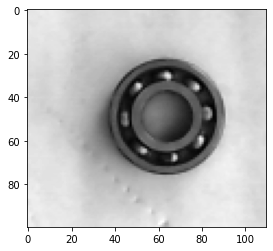

In [11]:
blank= np.zeros_like(image_gray)
region_of_interest= cv.fillPoly(blank, ROI,255)
region_of_interest_image= cv.bitwise_and(image_gray, region_of_interest)
crop=region_of_interest_image[180:280, 250:360]
#cropped=cv.cvtColor(crop,cv.COLOR_)
plt.imshow(crop,cmap='gray')

In [5]:
img2 = crop.copy()
temp_path="savedImage1.png"
template = cv.imread(temp_path)
#w, h = template.shape[::-1]
(h,w)= template.shape[:2]

methods = ['cv.TM_CCOEFF', 'cv.TM_CCORR', 'cv.TM_SQDIFF']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:1164: error: (-215:Assertion failed) (depth == CV_8U || depth == CV_32F) && type == _templ.type() && _img.dims() <= 2 in function 'cv::matchTemplate'
